In [14]:
import pandas as pd, numpy as np, seaborn as sns

from matplotlib import pyplot as plt 
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'E:/TRUCK AADT/'

In [4]:
dt = pd.read_csv(path + 'truck_aadt.csv')
dt.head()

,SORT,uniqid,Volume Station ID,Class Count Station,Class Count Source,Route,BMP,Mid Milepoint,EMP,ADT_Station_Type,year,TruckAADT,stl_taadt,Mainline,RURAL_URBAN,road_type,LANEWID,LANES,FC,AADP,zbc_num,Pop5min,DPop5min,Worker5min,Resident5min,HH5min,PerCapitaIncome5min,MedianAge5min,Employed5min,MdHHIn5min,Transport/MarterialMoving5min,Businesses5min,Employees,RlvntBusi5min,PopDen,DayPopDen,BusinessDen,EmployeeDen,KHFN,Area5min
0,1,12494,1001,1001,Station is a Class Count,001-KY-0076 -000,12.203,13.275,14.452,Classification,2021,105,75,Mainline,Rural,5,9,2,5,0.692801,3610.680747,475,354,73,281,203,17305,43.5,195,33128,16.9,5,15,0,44.392523,33.084112,0.467290,1.401869,5,10.696079
1,7,1710,1010,1010,Station is a Class Count,001-KY-0080 -000,13.223,16.271,19.318,Classification,2019,401,173,Mainline,Rural,5,10,2,5,15.538700,1386.976374,1750,1729,681,1048,737,19399,34.5,719,36448,7.9,90,521,12,218.750000,216.125000,11.250000,65.125000,5,7.998899
2,14,1712,1021,1021,Station is a Class Count,001-KY-0206 -000,2.972,4.789,6.606,Classification,2019,219,117,Mainline,Rural,5,9,2,5,5.563321,1551.755366,517,371,90,281,197,21803,41.2,238,43303,10.9,7,19,0,55.891892,40.108108,0.756757,2.054054,5,9.254339
3,26,12485,1047,1047,Station is a Class Count,001-KY-0055 -000,15.245,18.275,21.305,Classification,2021,1167,709,Mainline,Rural,3,12,2,3,60.662537,52018.836140,1014,1105,521,584,400,23586,44.5,431,45879,10.0,61,407,5,62.786378,68.421053,3.777090,25.201238,3,16.153081
4,32,12504,1058,1058,Station is a Class Count,001-KY-0551 -000,3.792,7.867,11.941,Classification,2021,79,106,Mainline,Rural,5,10,2,5,2.778877,1959.402503,51,38,8,30,22,18279,44.2,21,33352,14.3,2,10,0,16.190476,12.063492,0.634921,3.174603,5,3.146193


In [50]:
sorted(dt['FC'].unique())

[1, 2, 3, 4, 5, 6, 7]

In [51]:
dt['Functional Classification'] = np.where(dt['FC'] == 1, 'Interstate',
                                   np.where(dt['FC'] == 2, 'Principal Arterial - Freeways and Expressways',
                                   np.where(dt['FC'] == 3, 'Principal Arterial - Other', 
                                   np.where(dt['FC'] == 4, 'Minor Arterial', 
                                   np.where(dt['FC'] == 5, 'Major Collector', 
                                   np.where(dt['FC'] == 6, 'Minor Collector', 
                                   np.where(dt['FC'] == 7, 'Local Access', None)))))))

In [53]:
df = dt[['Class Count Station','ADT_Station_Type', 'FC','Functional Classification','year','TruckAADT','stl_taadt']]
df.head()

,Class Count Station,ADT_Station_Type,FC,Functional Classification,year,TruckAADT,stl_taadt
0,1001,Classification,5,Major Collector,2021,105,75
1,1010,Classification,5,Major Collector,2019,401,173
2,1021,Classification,5,Major Collector,2019,219,117
3,1047,Classification,3,Principal Arterial - Other,2021,1167,709
4,1058,Classification,5,Major Collector,2021,79,106


In [ ]:
#You can use volume ranges <500, 500-1000, 1000-2500, 2500-5000, >5000 and
#put volume ranges as x-axis and percent difference as y axis. 
#The percent difference is 100* (stl aadt – kytc aadt)/kytc_aadt.

In [54]:
column_group = 'stl_taadt'
df['bins'] = np.where(df[column_group] < 500, '0-500 Range', 
                     np.where(df[column_group] <= 1000, '500-1000 Range',
                     np.where(df[column_group] <= 2500, '1000-2500 Range',
                     np.where(df[column_group] <= 5000, '2500-5000 Range',
                     np.where(df[column_group] > 5000, '> 5000 Range', None)))))
df.head()

,Class Count Station,ADT_Station_Type,FC,Functional Classification,year,TruckAADT,stl_taadt,bins
0,1001,Classification,5,Major Collector,2021,105,75,0-500 Range
1,1010,Classification,5,Major Collector,2019,401,173,0-500 Range
2,1021,Classification,5,Major Collector,2019,219,117,0-500 Range
3,1047,Classification,3,Principal Arterial - Other,2021,1167,709,500-1000 Range
4,1058,Classification,5,Major Collector,2021,79,106,0-500 Range


In [55]:
df['difference'] = df['stl_taadt'] - df['TruckAADT']
df['percent_diff'] = 100 * (df['difference']/df['TruckAADT'])
df.head()

,Class Count Station,ADT_Station_Type,FC,Functional Classification,year,TruckAADT,stl_taadt,bins,difference,percent_diff
0,1001,Classification,5,Major Collector,2021,105,75,0-500 Range,-30,-28.571429
1,1010,Classification,5,Major Collector,2019,401,173,0-500 Range,-228,-56.857855
2,1021,Classification,5,Major Collector,2019,219,117,0-500 Range,-102,-46.575342
3,1047,Classification,3,Principal Arterial - Other,2021,1167,709,500-1000 Range,-458,-39.245930
4,1058,Classification,5,Major Collector,2021,79,106,0-500 Range,27,34.177215


In [144]:
df=df.sort_values(by=['FC','Functional Classification'])
df.head()

,Class Count Station,ADT_Station_Type,FC,Functional Classification,year,TruckAADT,stl_taadt,bins,difference,percent_diff
1935,92289,Classification,1,Interstate,2021,3120,2616,2500-5000 Range,-504,-16.153846
360,16815,Classification,1,Interstate,2020,2920,2378,1000-2500 Range,-542,-18.561644
1411,63827,Full Coverage,1,Interstate,2021,11243,11093,> 5000 Range,-150,-1.334163
359,16813,Classification,1,Interstate,2021,3151,2635,2500-5000 Range,-516,-16.375754
412,19811,Full Coverage,1,Interstate,2021,6054,5671,> 5000 Range,-383,-6.326396


In [56]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Class Count Station        2486 non-null   object 
 1   ADT_Station_Type           2486 non-null   object 
 2   FC                         2486 non-null   int64  
 3   Functional Classification  2486 non-null   object 
 4   year                       2486 non-null   int64  
 5   TruckAADT                  2486 non-null   int64  
 6   stl_taadt                  2486 non-null   int64  
 7   bins                       2486 non-null   object 
 8   difference                 2486 non-null   int64  
 9   percent_diff               2486 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 194.3+ KB


In [89]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FC,2486.0,4.195495,1.194048,1.0,4.000000,4.000000,5.000000,7.00000
year,2486.0,2020.034996,0.829524,2019.0,2019.000000,2020.000000,2021.000000,2021.00000
TruckAADT,2486.0,1178.853178,2915.065377,3.0,139.000000,351.500000,890.750000,28158.00000
stl_taadt,2486.0,1045.097747,3108.709794,0.0,99.000000,234.000000,552.000000,27525.00000
difference,2486.0,-133.755430,822.610796,-13349.0,-234.750000,-74.000000,1.000000,7694.00000
percent_diff,2486.0,-14.959255,62.105419,-100.0,-46.106812,-26.167052,0.695009,1393.84058


In [112]:
df_filtered = df[df.percent_diff < 300]

In [145]:
df['Functional Classification'].unique()

array(['Interstate', 'Principal Arterial - Freeways and Expressways',
       'Principal Arterial - Other', 'Minor Arterial', 'Major Collector',
       'Minor Collector', 'Local Access'], dtype=object)

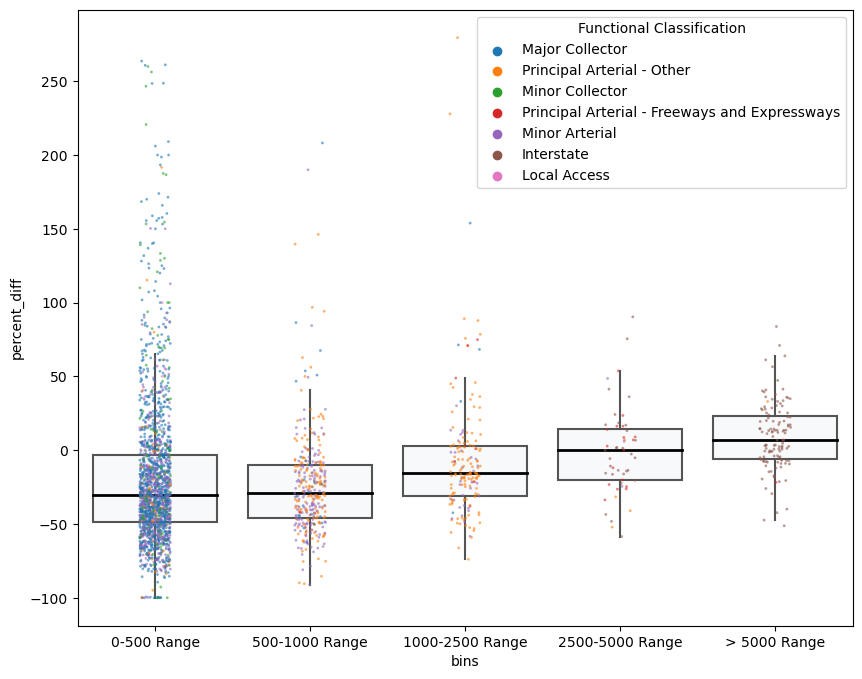

In [146]:
#option 1
import seaborn.objects as so
fig, ax = plt.subplots(1, 1, figsize=(10,8))




ax = sns.stripplot(x='bins', 
                    y='percent_diff', 
                    data=df_filtered, 
                    hue='Functional Classification',
                    #color="grey",
                    jitter=0.1,
                   alpha = 0.6,
                    size=2)



#boxplot
c = '#535454'
ax = sns.boxplot(x='bins', 
                 y='percent_diff', 
                 data=df_filtered,  
                 showcaps=False,
                 sym = "",
                 #showmeans=True,
                 #meanline = True,
                 boxprops = dict(color = c, facecolor='#f7f9fa'),
                 whiskerprops = dict(color = c,),
                 medianprops=dict(linewidth = 2, color='black', snap=True)
                 
                )


plt.show()

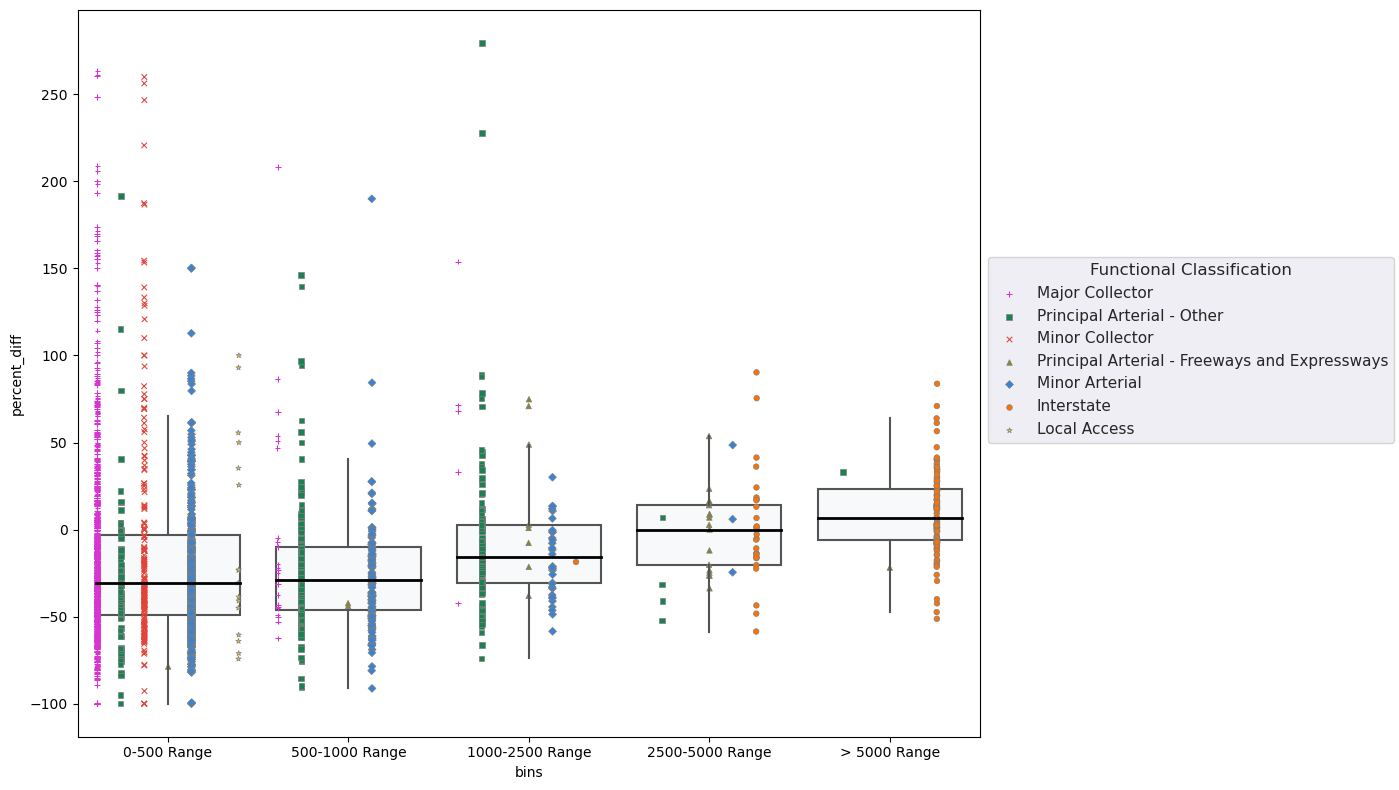

In [147]:
#option 2
import seaborn.objects as so
fig, ax = plt.subplots(1, 1, figsize=(10,8))

colordict = {'Interstate' : '#fc7303',
             'Principal Arterial - Freeways and Expressways' : '#8a842f',
             'Principal Arterial - Other' : '#198251',
             'Minor Arterial' : '#3783d4',
             'Major Collector' : '#d934d1',
             'Minor Collector' : '#e34236',
             'Local Access' : '#e3c336'}

markerdict = {'Interstate' : 'o',
             'Principal Arterial - Freeways and Expressways' : '^',
             'Principal Arterial - Other' : 's',
             'Minor Arterial' : 'D',
             'Major Collector' : '+',
             'Minor Collector' : 'x',
             'Local Access' : '*'}




p=(
so.Plot(df_filtered, 
        x = 'bins',
        y = 'percent_diff', 
        color = 'Functional Classification',
        marker = 'Functional Classification',).add(
        so.Dot(pointsize=4, edgecolor="gray"),
        so.Dodge(), # use this if you want to separate the markers with different colors
        so.Jitter(0.2),
    
).scale(
        color=so.Nominal(colordict),
        marker=so.Nominal(markerdict)
    ).layout(engine='tight')
)

p.on(ax).plot()


#boxplot
c = '#535454'
ax = sns.boxplot(x='bins', 
                 y='percent_diff', 
                 data=df_filtered,  
                 showcaps=False,
                 sym = "",
                 #showmeans=True,
                 #meanline = True,
                 boxprops = dict(color = c, facecolor='#f7f9fa'),
                 whiskerprops = dict(color = c,),
                 medianprops=dict(linewidth = 2, color='black', snap=True)
                 
                )


plt.show()